<a href="https://colab.research.google.com/github/tousifp777/EDA_Casestudies/blob/main/Loan_Approval_EDA_CaseStudy_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import Data Manupulating Library
import pandas as pd
import numpy as np

# Importing Data Visualization Library
import seaborn as sns
import matplotlib.pyplot as plt

# Import FilterWarning Library
import warnings
warnings.filterwarnings('ignore')

# Import Logging
import logging
logging.basicConfig(level = logging.INFO,
                    filename = 'model.log',
                    format = '%(asctime)s) - % (levelname)s - %(message)s',
                    filemode = 'w')
logging.info('Model Started')

In [ ]:
# Import data using pandas function

df = pd.read_csv('loan_data.csv')
df.sample(frac = 1)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
20786,29.0,female,Bachelor,51677.0,4,RENT,5000.0,PERSONAL,11.01,0.10,6.0,705,No,0
2284,24.0,female,Associate,57156.0,4,RENT,13000.0,VENTURE,11.01,0.23,2.0,491,Yes,0
35063,28.0,female,High School,114423.0,5,MORTGAGE,7442.0,VENTURE,11.90,0.07,6.0,684,No,0
20054,28.0,male,Associate,36910.0,7,RENT,3825.0,EDUCATION,14.27,0.10,8.0,634,Yes,0
36664,24.0,male,Bachelor,44337.0,5,MORTGAGE,5283.0,EDUCATION,8.74,0.12,3.0,627,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14668,24.0,female,Bachelor,34432.0,6,OWN,10000.0,HOMEIMPROVEMENT,10.37,0.29,2.0,689,No,0
44702,55.0,female,Associate,68221.0,31,MORTGAGE,10000.0,HOMEIMPROVEMENT,15.76,0.15,15.0,665,No,1
7182,23.0,female,High School,96988.0,0,RENT,7000.0,VENTURE,7.14,0.07,2.0,672,No,0
38513,24.0,female,High School,162768.0,2,MORTGAGE,12254.0,VENTURE,12.73,0.08,2.0,646,Yes,0


In [ ]:
# Checking Dataset Information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

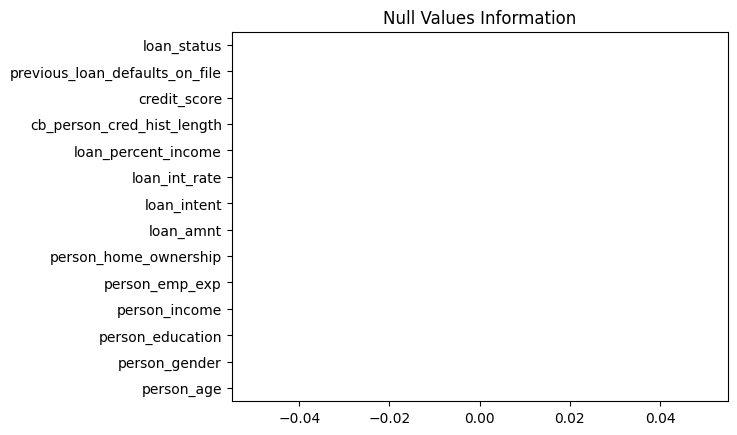

In [ ]:
# Checking Null Values Present in Dataset

df.isnull().sum().plot(kind = 'barh')
plt.title('Null Values Information')
plt.show()

In [ ]:
# S plit the dataset into Categorical and Numerical cols...
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(exclude = 'object')

In [ ]:
# Exploratory Data Analysis:
# 1. Univariate Analysis

'''
Step1: Create a Blank List: stats[]
Step2: Create Dictionary using OrderedDict
Step3: Append list with Dictionary
Step4: Convert stats[] i.e List info DataFrame
'''

from collections import OrderedDict
stats = []

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':df[i].count(),
        'Miximum':df[i].max(),
        'Minimum':df[i].min(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75)-df[i].quantile(0.25),
        'Standard Deviation':df[i].std(),
        'Kurtosis':df[i].kurtosis(),
        'Skewness':df[i].skew()
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)

report

,Feature,Count,Miximum,Minimum,Mean,Median,Q1,Q3,IQR,Standard Deviation,Kurtosis,Skewness
0,person_age,45000,144.00,20.00,27.764178,26.00,24.00,30.00,6.00,6.045108,18.649449,2.548154
1,person_income,45000,7200766.00,8000.00,80319.053222,67048.00,47204.00,95789.25,48585.25,80422.498632,2398.684769,34.137583
2,person_emp_exp,45000,125.00,0.00,5.410333,4.00,1.00,8.00,7.00,6.063532,19.168324,2.594917
3,loan_amnt,45000,35000.00,500.00,9583.157556,8000.00,5000.00,12237.25,7237.25,6314.886691,1.351215,1.179731
4,loan_int_rate,45000,20.00,5.42,11.006606,11.01,8.59,12.99,4.40,2.978808,-0.420335,0.213784
5,loan_percent_income,45000,0.66,0.00,0.139725,0.12,0.07,0.19,0.12,0.087212,1.082416,1.034512
6,cb_person_cred_hist_length,45000,30.00,2.00,5.867489,4.00,3.00,8.00,5.00,3.879702,3.725945,1.631720
7,credit_score,45000,850.00,390.00,632.608756,640.00,601.00,670.00,69.00,50.435865,0.203022,-0.610261
8,loan_status,45000,1.00,0.00,0.222222,0.00,0.00,0.00,0.00,0.415744,-0.214176,1.336351


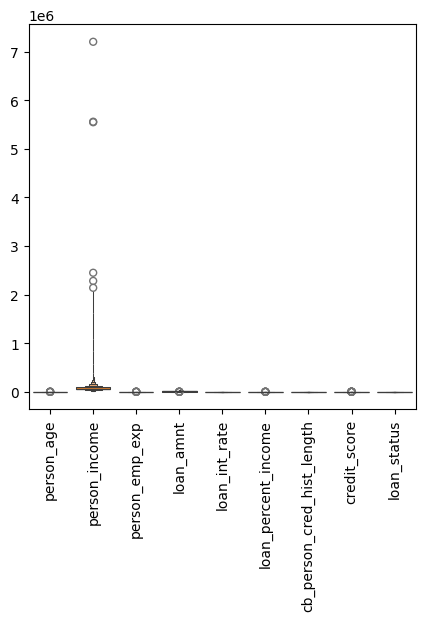

In [ ]:
plt.figure(figsize = (5,5))
sns.boxenplot(data = df)
plt.xticks(rotation = 90)
plt.show()

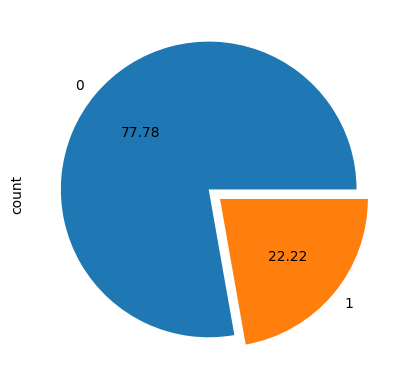

In [ ]:
# Distribution of loan status

'''
Data Insights:
77.78% people Not appoved their loan status from bank
22.22% people approved their loan status from bank
'''

df['loan_status'].value_counts().plot(kind = 'pie',autopct = '%1.2f',explode = [0.05,0.05])
plt.show()

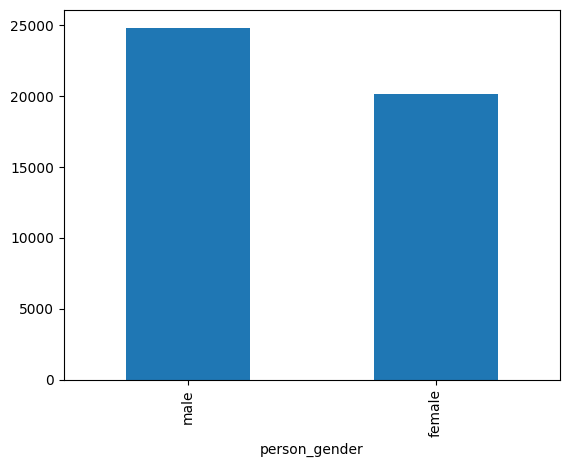

In [ ]:
# Gender Distribution

df['person_gender'].value_counts().plot(kind = 'bar')
plt.show()

In [ ]:
# Loan status based on Gender
# Loan is approved and Gender must be male
loan_status_approved_male = df[(df['loan_status'] == 1) & (df['person_gender'] == 'male')]
loan_status_approved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
12,23.0,male,Bachelor,114860.0,3,RENT,35000.0,VENTURE,7.90,0.30,2.0,573,No,1
13,26.0,male,Master,130713.0,0,RENT,35000.0,EDUCATION,18.39,0.27,4.0,708,No,1
18,23.0,male,Bachelor,136628.0,0,RENT,35000.0,DEBTCONSOLIDATION,18.25,0.26,4.0,709,No,1
24,22.0,male,Bachelor,97420.0,1,RENT,33950.0,PERSONAL,14.54,0.35,4.0,691,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [ ]:
# Loan is approved and Gender must be female
loan_status_approved_female=df[(df['loan_status'] == 1) & (df['person_gender'] == 'female')]
loan_status_approved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44988,28.0,female,Associate,49170.0,4,RENT,10401.0,HOMEIMPROVEMENT,11.97,0.21,6.0,677,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1


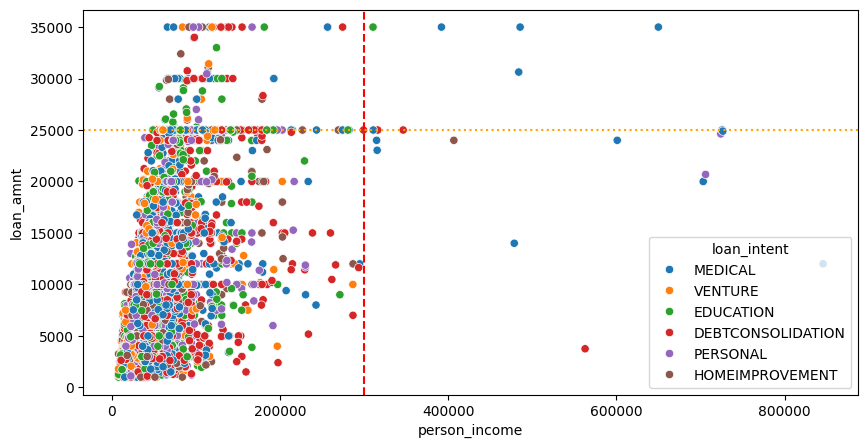

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'],y =
loan_status_approved_male['loan_amnt'],hue = loan_status_approved_male['loan_intent'])
plt.axvline(300000,linestyle = '--',color = 'red')
plt.axhline(25000,linestyle = ':',color = 'orange')
plt.show()

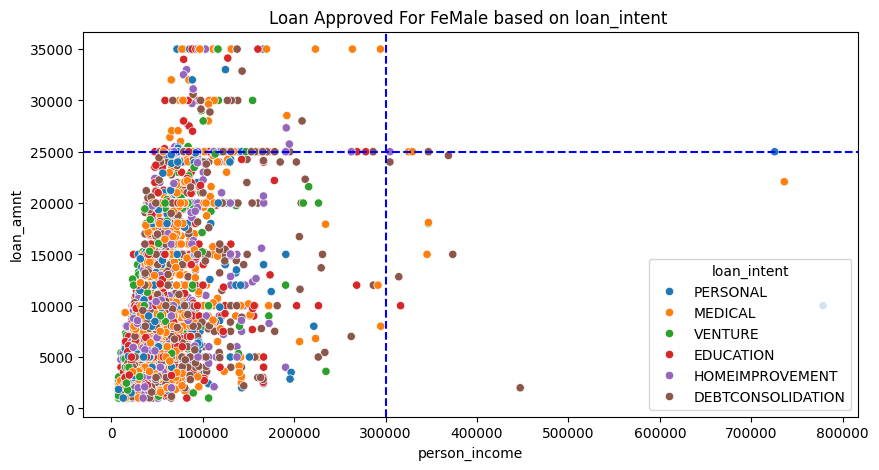

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'], y = loan_status_approved_female['loan_amnt'],hue =loan_status_approved_female['loan_intent'])
plt.title('Loan Approved For FeMale based on loan_intent ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

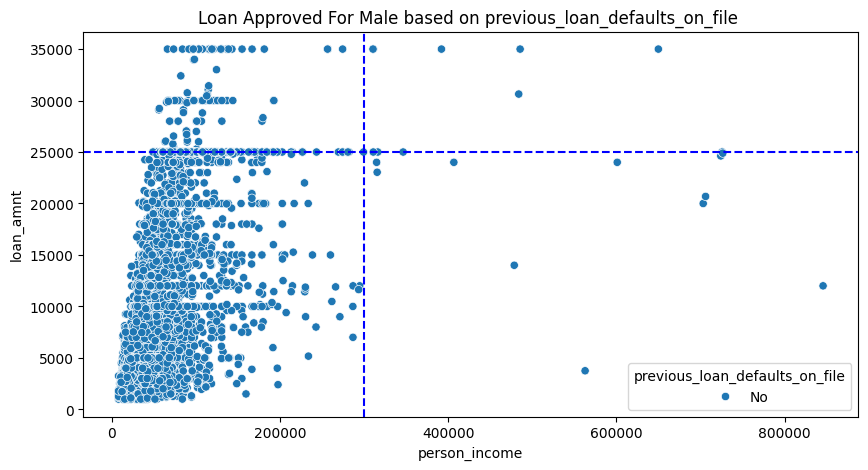

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_male['person_income'], y = loan_status_approved_male['loan_amnt'],hue =loan_status_approved_male['previous_loan_defaults_on_file'])
plt.title('Loan Approved For Male based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

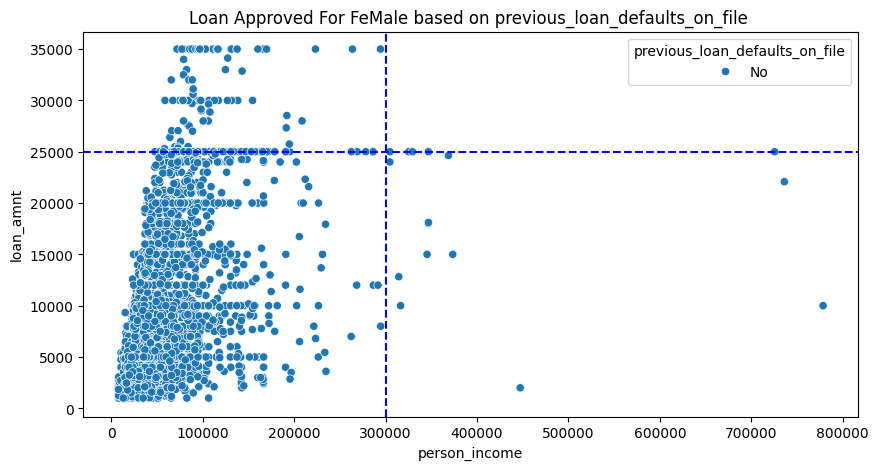

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_approved_female['person_income'], y = loan_status_approved_female['loan_amnt'],hue =loan_status_approved_female['previous_loan_defaults_on_file'])
plt.title('Loan Approved For FeMale based on previous_loan_defaults_on_file ')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

In [ ]:
loan_status_notapproved_male=df[(df['loan_status'] == 0) & (df['person_gender'] == 'male')]
loan_status_notapproved_male

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
16,23.0,male,Bachelor,144943.0,0,RENT,35000.0,EDUCATION,7.90,0.24,4.0,663,No,0
20,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
21,25.0,male,High School,165792.0,4,RENT,34800.0,PERSONAL,16.77,0.21,2.0,662,No,0
27,23.0,male,High School,14293.0,0,OWN,1400.0,PERSONAL,9.32,0.10,3.0,607,No,0
31,25.0,male,Bachelor,144855.0,1,RENT,32000.0,VENTURE,6.62,0.22,2.0,586,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42098,26.0,male,Associate,85414.0,2,RENT,12000.0,EDUCATION,6.72,0.14,4.0,509,Yes,0
42099,25.0,male,Bachelor,165605.0,0,MORTGAGE,9989.0,VENTURE,5.92,0.06,4.0,648,No,0
42100,27.0,male,Associate,96196.0,1,MORTGAGE,8000.0,MEDICAL,6.38,0.08,8.0,593,Yes,0
42103,36.0,male,Bachelor,60006.0,15,OWN,2755.0,MEDICAL,8.92,0.05,9.0,609,Yes,0


In [ ]:
loan_status_notapproved_female=df[(df['loan_status'] == 0) & (df['person_gender'] == 'female')]
loan_status_notapproved_female

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
14,23.0,female,Associate,138998.0,0,RENT,35000.0,EDUCATION,7.90,0.25,4.0,583,No,0
15,23.0,female,Master,600891.0,5,MORTGAGE,30000.0,DEBTCONSOLIDATION,10.65,0.05,3.0,670,Yes,0
23,24.0,female,Bachelor,13866.0,0,OWN,1500.0,PERSONAL,7.29,0.11,3.0,600,Yes,0
33,25.0,female,High School,368115.0,3,RENT,24250.0,DEBTCONSOLIDATION,13.85,0.07,3.0,567,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42101,27.0,female,High School,107051.0,2,MORTGAGE,24000.0,MEDICAL,11.21,0.22,5.0,611,Yes,0
42102,28.0,female,Associate,36900.0,6,RENT,2000.0,VENTURE,5.77,0.05,6.0,526,Yes,0
42104,25.0,female,Bachelor,64146.0,2,MORTGAGE,7200.0,VENTURE,10.28,0.11,3.0,625,Yes,0
42106,28.0,female,High School,110291.0,7,RENT,13453.0,VENTURE,13.29,0.12,6.0,631,Yes,0


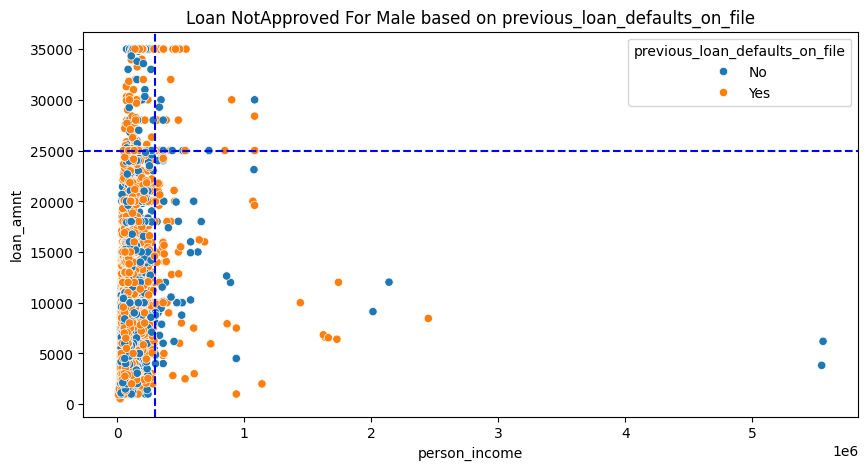

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'], y = loan_status_notapproved_male['loan_amnt'],hue =loan_status_notapproved_male['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For Male based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

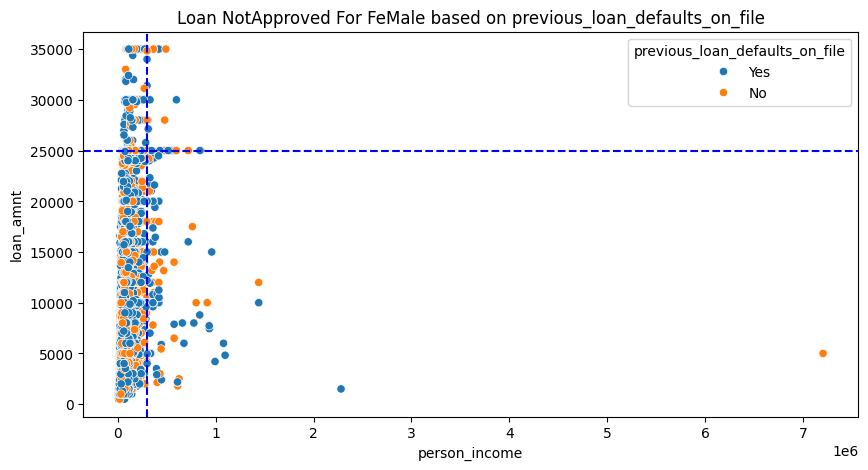

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'], y = loan_status_notapproved_female['loan_amnt'],hue =loan_status_notapproved_female['previous_loan_defaults_on_file'])
plt.title('Loan NotApproved For FeMale based on previous_loan_defaults_on_file')
plt.axvline(300000,linestyle='--',c = 'b')
plt.axhline(25000,linestyle='--',c = 'b')
plt.show()

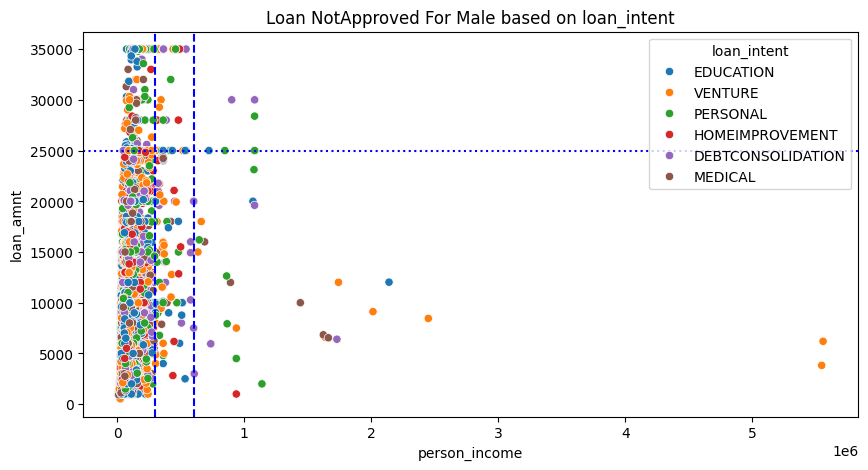

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_male['person_income'],y = loan_status_notapproved_male['loan_amnt'],hue = loan_status_notapproved_male['loan_intent'])
plt.title('Loan NotApproved For Male based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.axvline(600000,linestyle = '--',c = 'b')

plt.show()

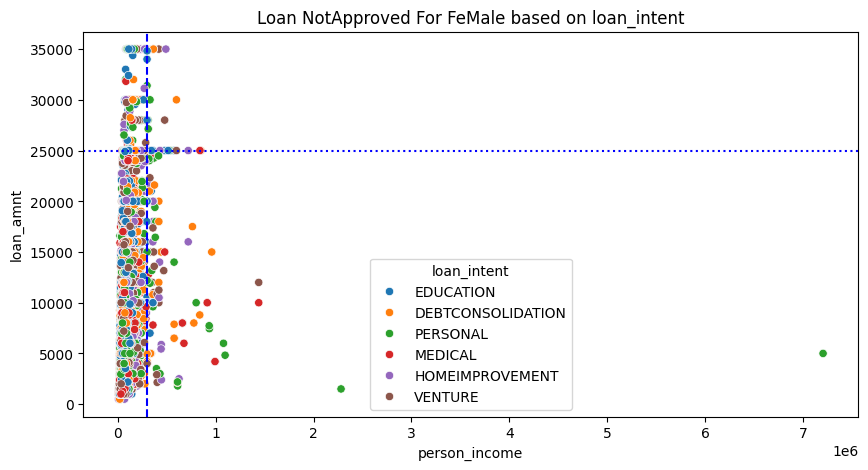

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = loan_status_notapproved_female['person_income'],y = loan_status_notapproved_female['loan_amnt'],hue = loan_status_notapproved_female['loan_intent'])
plt.title('Loan NotApproved For FeMale based on loan_intent')
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.show()

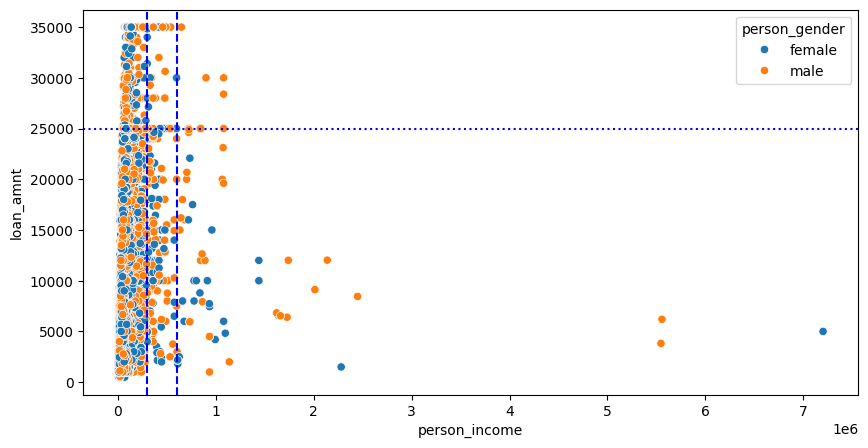

In [ ]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['person_income'],y = df['loan_amnt'],hue =df['person_gender'])
plt.axvline(300000,linestyle = '--',c = 'b')
plt.axhline(25000,linestyle = ':',c = 'b')
plt.axvline(600000,linestyle = '--',c = 'b')
plt.show()


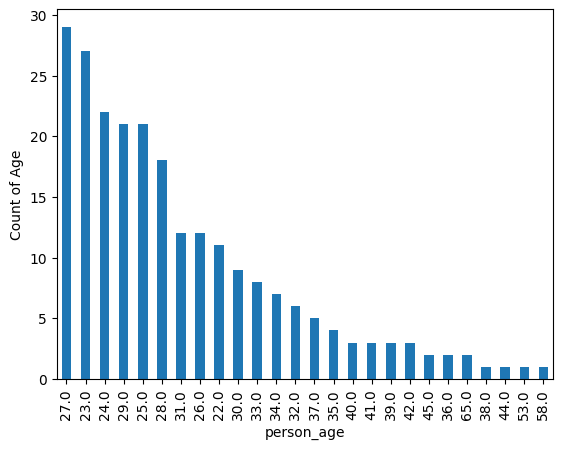

In [ ]:
df[df['loan_amnt']== 35000]['person_age'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Count of Age')
plt.show()

In [ ]:
df['loan_amnt'].max()

35000.0

In [ ]:
df[df['loan_amnt']== 35000]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44030,27.0,male,Associate,138803.0,5,MORTGAGE,35000.0,DEBTCONSOLIDATION,17.98,0.25,6.0,642,No,1
44130,27.0,female,Bachelor,116746.0,5,RENT,35000.0,VENTURE,17.49,0.30,4.0,675,No,1
44210,23.0,male,High School,129686.0,0,RENT,35000.0,DEBTCONSOLIDATION,16.48,0.27,4.0,672,No,1
44269,34.0,female,Doctorate,137667.0,12,MORTGAGE,35000.0,DEBTCONSOLIDATION,18.59,0.25,10.0,706,No,1


In [ ]:
df[(df['loan_amnt'] == 35000) & (df['previous_loan_defaults_on_file'] == 'Yes')]

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
20,25.0,male,Bachelor,195718.0,0,RENT,35000.0,VENTURE,7.49,0.18,4.0,684,Yes,0
103,25.0,female,High School,277017.0,4,MORTGAGE,35000.0,MEDICAL,13.99,0.13,4.0,622,Yes,0
140,23.0,male,Bachelor,258980.0,0,MORTGAGE,35000.0,MEDICAL,14.79,0.14,3.0,618,Yes,0
336,25.0,female,Master,202525.0,1,MORTGAGE,35000.0,PERSONAL,10.65,0.17,2.0,589,Yes,0
363,22.0,male,High School,193337.0,0,MORTGAGE,35000.0,MEDICAL,10.65,0.18,4.0,602,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40114,31.0,female,Bachelor,124608.0,10,MORTGAGE,35000.0,PERSONAL,9.05,0.28,8.0,637,Yes,0
40827,31.0,male,Master,363682.0,7,MORTGAGE,35000.0,DEBTCONSOLIDATION,13.81,0.10,10.0,716,Yes,0
40884,24.0,male,High School,138890.0,0,RENT,35000.0,EDUCATION,16.69,0.25,4.0,619,Yes,0
41663,28.0,male,High School,138865.0,1,RENT,35000.0,EDUCATION,15.92,0.25,5.0,667,Yes,0


In [ ]:
a = df[(df['loan_amnt'] == 35000) & (df['previous_loan_defaults_on_file'] == 'Yes')]
a['loan_status'].value_counts()

,count
loan_status,
0,101


In [ ]:
101/234  # loan rejcted

0.43162393162393164

In [ ]:
b = df[(df['loan_amnt'] == 35000) & (df['previous_loan_defaults_on_file'] == 'No')]
b['loan_status'].value_counts()

,count
loan_status,
1,73
0,60


In [ ]:
b

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44030,27.0,male,Associate,138803.0,5,MORTGAGE,35000.0,DEBTCONSOLIDATION,17.98,0.25,6.0,642,No,1
44130,27.0,female,Bachelor,116746.0,5,RENT,35000.0,VENTURE,17.49,0.30,4.0,675,No,1
44210,23.0,male,High School,129686.0,0,RENT,35000.0,DEBTCONSOLIDATION,16.48,0.27,4.0,672,No,1
44269,34.0,female,Doctorate,137667.0,12,MORTGAGE,35000.0,DEBTCONSOLIDATION,18.59,0.25,10.0,706,No,1


Text(0, 0.5, 'Credit Score Distribution')

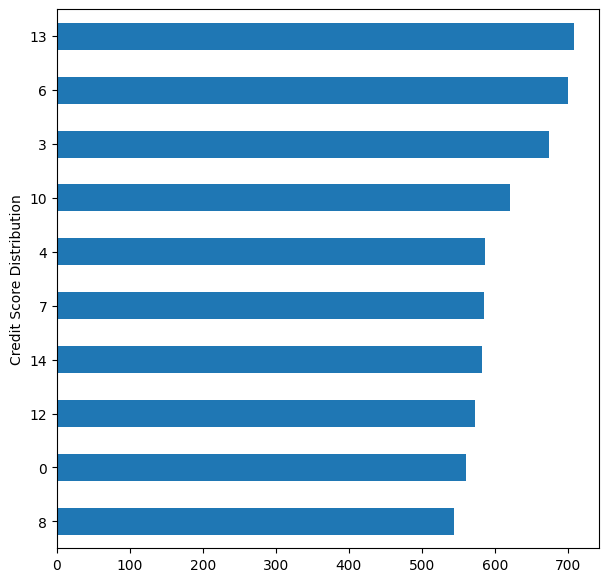

In [ ]:
plt.figure(figsize=(7,7))
b['credit_score'].head(10).sort_values(ascending=True).plot(kind='barh')
plt.ylabel('Credit Score Distribution')

In [ ]:
b['credit_score'].max(),b['credit_score'].min()

(742, 470)

In [ ]:
b[b['credit_score'] < 1000]['loan_status'].value_counts()

,count
loan_status,
1,73
0,60
